In [1]:
import simplejson as json
questions = json.load(open("10group.json"))['questions']
quest_map = {q['question']:q for q in questions}

notation = {
    'x':  ['economy', 'left/right'],
    'y':  ['government', 'authoritarian/libertarian'],
    'ax': ['economy', 'capitalism/socialism'],
    'ay': ['economy', 'free/planned'],
    'bx': ['government', 'libertarian/authoritarian'],
    'by': ['government', 'autocracy/democracy'],
    'cx': ['diplomacy', 'particular/universal'],
    'cy': ['diplomacy', 'globalism/nationalism'],
    'dx': ['society', 'tradition/progress'],
    'dy': ['society', 'conserve/reform'],
    'ex': ['technology', 'decelerate/accelerate'],
    'ey': ['technology', 'primitivism/transhumanism'],
    'fx': ['law', 'civil/common'],
    'fy': ['law', 'punitive/rehabilatative'],
    'gx': ['culture', 'hierarchy/equality'],
    'gy': ['culture', 'multicultural/monocultural'],
    'hx': ['procedure', 'persist/compromize'],
    'hy': ['procedure', 'direct/transitional'],
    'ix': ['politics', 'politicized/apoliticized'],
    'iy': ['politics', 'radical/moderate'],
    'ja': ['morality', 'individualism/collectivism'],
    'jb': ['morality', 'revolution/peaceful'],
    'jc': ['morality', 'idealism/realism'],
    'jd': ['morality', 'consequential/deontologic']
}

In [2]:
effects = {}
abs_effects = {}
for q in questions:
    for e in q['effects']:
        if e not in effects:
            effects[e] = 0
            abs_effects[e] = 0
            
            
        effects[e] += q['effects'][e]
        abs_effects[e] += abs(q['effects'][e])
        

print("effects: ", effects)
print("abs_effects: ", abs_effects)
max_total_probs = max([abs_effects[x] for x in abs_effects])
ae_bias = {k:max_total_probs/abs_effects[k] for k in abs_effects}

effects:  {'y': -25, 'ay': 0, 'x': 10, 'ax': 10, 'bx': -20, 'by': -15, 'cx': -10, 'cy': 5, 'dx': -5, 'dy': 5, 'ex': -55, 'ey': 0, 'fx': -10, 'fy': 15, 'gx': -25, 'gy': 0, 'hx': -15, 'hy': -5, 'ix': 20, 'iy': -10, 'ja': 5, 'jb': 0, 'jc': -5, 'jd': 0}
abs_effects:  {'y': 155, 'ay': 40, 'x': 80, 'ax': 80, 'bx': 30, 'by': 85, 'cx': 40, 'cy': 65, 'dx': 55, 'dy': 45, 'ex': 55, 'ey': 30, 'fx': 30, 'fy': 25, 'gx': 25, 'gy': 30, 'hx': 15, 'hy': 15, 'ix': 20, 'iy': 20, 'ja': 15, 'jb': 10, 'jc': 15, 'jd': 20}


In [3]:
results = []
with open("10group_more_illness_dsm5f.jsonl") as f:
    for line in f:
        obj = json.loads(line)
        results.append(obj)

In [4]:
dlabels = [ "paraphilia", "paranoia", "narcissism", "schizophrenia", "depression", "OCD", "dysphoria", "gender dysphoria", "autism", "sociopathy", "psychopathy", "mental retardation", "ptsd", "bipolar", "ADHD", "anorexia", "erectile dysfunction", "kleptomania", "dementia", "borderline", "panic disorder", "agoraphobia", "generalized anxiety disorder", "dissociative identity disorder", "bulimia nervosa", "postpartum depression", "seasonal affective disorder", "histrionic", "antisocial", "avoidant personality", "dependent personality disorder", "schizoid", "schizotypal", "trichotillomania", "body dysmorphic", "pyromania", "insomnia", "sleep apnea", "narcolepsy", "somnambulism", "night terrors", "sleep paralysis", "restless leg syndrome", "alcoholism", "drug addiction", "gambling addiction", "internet addiction", "hoarding disorder", "self-harm", "social anxiety disorder", "selective mutism", "separation anxiety disorder", "specific phobias", "conversion disorder", "hypochondriasis", "body integrity identity disorder", "factitious disorder", "Munchausen syndrome", "pica", "rumination disorder", "oppositional defiant disorder", "conduct disorder", "intermittent explosive disorder", "pyromania", "major depressive disorder", "dysthymia", "cyclothymia", "premenstrual dysphoric disorder", "reactive attachment disorder", "disinhibited social engagement disorder", "adjustment disorders", "acute stress disorder", "dissociative amnesia", "depersonalization", "somatic symptom disorder", "illness anxiety disorder", "delusional disorder", "brief psychotic disorder", "schizophreniform disorder", "schizoaffective disorder", "catatonia", "tic disorders", "Tourette's syndrome", "stereotypic movement disorder", "binge eating", "rumination", "feeding disorder", "disruptive mood dysregulation"]

In [5]:
disorders = {x:[] for x in dlabels}
statements = {}
for belief in results:
    question = belief['question']
    probs = []
    for cell in belief['results']:
        disorder = cell[0]
        if "/" in disorder: disorder = disorder.split("/")[0]
        likeness = cell[2]
        prob = cell[1]
        disorders[disorder].append([question, prob, likeness])
        probs.append([disorder, prob])
    probs.sort(key = lambda x:x[1], reverse=True)
    statements[question] = probs
    
for d in disorders:
    disorders[d].sort(key=lambda x:x[1], reverse=True)

In [6]:
qidx = []
for q in results:
    qidx.append(q['question'])
qidx

['In the current system, it is necessary for the government to intervene in the economy to protect consumers.',
 'Without state intervention, monopolies would violate human rights.',
 'Private organisations and corporations cannot be trusted and thus need regulating by the government.',
 'Most corporations should be state-owned.',
 'A free economy is the best tool for establishing wages and the price of labour.',
 'The market regulates itself, unjust monopolies will not survive in a free market.',
 'A regulated economy is more unfair for the people, when compared to a laissez-faire economy.',
 'Taxation for the rich should be lowered, or even abolished.',
 'Communism is an ideology that would never work in practice.',
 'Freedom of business is the best practical way a society can prosper.',
 'Governmental social programs should be replaced with private charities and organizations.',
 'If wages exist at all, the minimum wage should be lowered or stagnated, or even abolished.',
 'The mark

In [ ]:
len(disorders['autism'])

In [ ]:
len(disorders['rumination disorder'])

In [7]:
del disorders['rumination disorder']

In [8]:
pos_matrix = {}
for d in disorders:
    arr = [0]*len(results)
    pos = 0
    for q in disorders[d]:
        idx = qidx.index(q[0])
        arr[idx] = pos
        pos += 1
    pos_matrix[d] = arr

In [9]:
import numpy as np
def norm(arr):
    matrix = np.array(arr)
    m = max(matrix)
    return matrix / m

In [10]:
prob_matrix = {}
for d in disorders:
    arr = [0]*len(results)
    for q in disorders[d]:
        idx = qidx.index(q[0])
        arr[idx] = q[1]
    prob_matrix[d] = norm(arr)

In [11]:
for p in prob_matrix:
    print(prob_matrix[p])
    for e, x in enumerate(prob_matrix[p]):
        if x == 1:
            print(e, x)

[0.13352075 0.09548888 0.00645549 0.05146378 0.12878395 0.08580759
 0.0828205  0.12695263 0.0591312  0.10549832 0.06492133 0.14678053
 0.07433363 0.11385526 0.24332024 0.05840848 0.0840205  0.02987192
 0.07527582 0.01318654 0.06657941 0.11533372 0.11296832 0.20211029
 0.08583512 0.11263071 0.21764701 0.06184366 0.16458265 0.12789457
 0.08077147 0.03986881 0.03235007 0.08866446 0.03498656 0.01120248
 0.08598767 0.33010474 0.01165996 0.02697265 0.10106058 0.02190369
 0.08471736 0.0270962  0.00854185 0.41295157 0.21904084 0.58183671
 0.0965345  0.06460477 0.0761884  0.17728245 0.18348524 0.14728016
 0.01629365 0.14684079 0.11123814 0.12895715 0.12055468 0.14595107
 0.12600501 0.13849354 0.10610908 0.0288655  0.17759606 0.05493671
 0.11223767 0.14737248 0.14217184 0.15040348 0.4531202  0.0778082
 0.0582508  0.12901885 0.15513705 0.52314121 0.15056907 0.23520361
 0.08093572 0.05398525 0.11235664 0.08149153 0.04388022 0.04330549
 0.08369211 0.06698981 0.2061351  0.10868217 0.08372254 0.06671

In [12]:
pos_m = []
for x in pos_matrix:
    pos_m.append(pos_matrix[x])
    
prob_m = []
for x in prob_matrix:
    prob_m.append(prob_matrix[x])

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'POS MATRIX')

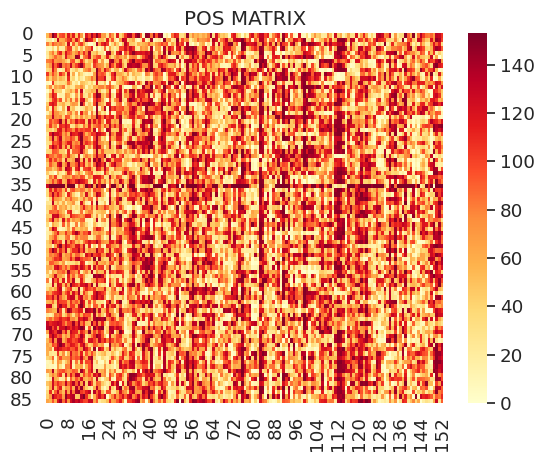

In [14]:
sns.set(font_scale=1.2)
g = sns.heatmap(
    pos_m,
    vmin=0,
    vmax=153,
    cmap="YlOrRd")
g.set_title("POS MATRIX")

Text(0.5, 1.0, 'POS MATRIX')

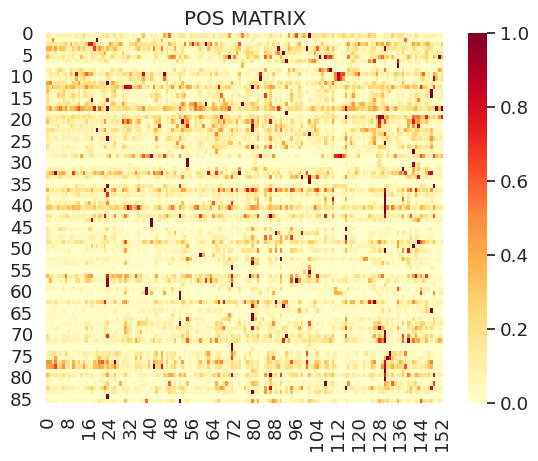

In [15]:
sns.set(font_scale=1.2)
g = sns.heatmap(
    prob_m,
    vmin=0,
    vmax=1,
    cmap="YlOrRd")
g.set_title("POS MATRIX")

In [16]:
total_scores = {x:{j:0 for j in notation} for x in dlabels}
total_weights = {x:{j:0 for j in notation} for x in dlabels}

all_scores = {j:0 for j in notation}
all_weights = {j:0 for j in notation}

for d in prob_matrix:
    for i, p in enumerate(prob_matrix[d]):
        effects = quest_map[qidx[i]]['effects']
        for key in effects:
            total_weights[d][key] += (abs(p)*ae_bias[key])
            total_scores[d][key] += ((p)*ae_bias[key])
            all_weights[key] += (abs(p)*ae_bias[key])
            all_scores[key] = ((p)*ae_bias[key])

        
for d in total_weights:
    tups = []
    for key in total_scores[d]:
        tups.append([notation[key], total_scores[d][key]])
    tups.sort(key=lambda x:x[1], reverse=True)
    print(d)
    for t in tups:
        print(t)
# tups = [[x,all_weights[x]*ae_bias[x]] for x in all_weights]
# tups.sort(key=lambda x:x[1], reverse=True)
# for t in tups:
#     print(notation[t[0]],t[1])

paraphilia
[['technology', 'primitivism/transhumanism'], 10.001440179565032]
[['technology', 'decelerate/accelerate'], 6.442589908100757]
[['politics', 'politicized/apoliticized'], 6.2494441810789345]
[['society', 'tradition/progress'], 6.0753237071547]
[['law', 'civil/common'], 5.714669408919065]
[['diplomacy', 'particular/universal'], 5.206085281318214]
[['culture', 'multicultural/monocultural'], 5.135730827300209]
[['culture', 'hierarchy/equality'], 4.783042903445469]
[['law', 'punitive/rehabilatative'], 4.766019350533105]
[['government', 'libertarian/authoritarian'], 3.98057420262042]
[['diplomacy', 'globalism/nationalism'], 3.6846072431843067]
[['morality', 'individualism/collectivism'], 3.4916795557677864]
[['government', 'authoritarian/libertarian'], 3.152284000709316]
[['politics', 'radical/moderate'], 3.1073148733278724]
[['morality', 'idealism/realism'], 3.0254021506322495]
[['economy', 'free/planned'], 2.960381042300768]
[['government', 'autocracy/democracy'], 2.950253556932

In [17]:
def cosine_similarity(x, y): 
    if len(x) != len(y): return None
    dot_product = np.dot(x, y)
    magnitude_x = np.sqrt(np.sum(x**2))
    magnitude_y = np.sqrt(np.sum(y**2))
    return dot_product / (magnitude_x * magnitude_y)


def get_dist_matrix(pm):
    dm = []
    for d1 in pm:
        dr = []
        for d2 in pm:
            dr.append(cosine_similarity(pm[d1], pm[d2]))
        dm.append(dr)
    return np.array(dm)

In [18]:
base_matrix = get_dist_matrix(prob_matrix)

results = []
for idx in range(len(questions)):
    new_prob_matrix = {}
    for p in prob_matrix:
        nr = prob_matrix[p].copy()
        nr = np.delete(nr, idx)
        new_prob_matrix[p] = nr
    new_matrix = get_dist_matrix(new_prob_matrix)
    dist_score = 0
    dist = np.linalg.norm(base_matrix-new_matrix)
    results.append([idx, dist])
    
results.sort(key=lambda x:x[1], reverse=True)

In [19]:
for r in results[:20]:
    q = qidx[r[0]]
    print(r[0], qidx[r[0]], r[1])
    teps = [[p, pos_matrix[p][r[0]]] for p in pos_matrix]
    teps.sort(key=lambda x:x[1], reverse=False)
    for e in quest_map[q]['effects']:
        print(notation[e])
    
    for t in teps[:5]:
        print(t[0]+": ", t[1])
    
    for t in teps[-5:]:
        print(t[0]+": ", t[1])
    print("\n")
#     print("\n\n")

40 Any drug should be legal as long as other people don't have to take the consequences. 5.087126981762363
['government', 'authoritarian/libertarian']
['government', 'autocracy/democracy']
alcoholism:  0
drug addiction:  0
antisocial:  1
conduct disorder:  7
self-harm:  8
major depressive disorder:  151
catatonia:  151
autism:  152
night terrors:  152
conversion disorder:  152


71 Traditional medicines are often more effective than modern medicines. 4.976470300133796
['society', 'tradition/progress']
hypochondriasis:  0
somatic symptom disorder:  0
illness anxiety disorder:  0
somnambulism:  1
factitious disorder:  1
sociopathy:  151
psychopathy:  151
schizoid:  151
disinhibited social engagement disorder:  151
pyromania:  191


130 A transitional state should be made. 4.674523693859063
['procedure', 'direct/transitional']
postpartum depression:  0
sleep apnea:  0
narcolepsy:  0
somnambulism:  0
night terrors:  0
oppositional defiant disorder:  139
dysthymia:  144
sociopathy:  145
ant

In [26]:
[s for s in pos_matrix['autism']]

[36,
 44,
 119,
 81,
 20,
 15,
 28,
 103,
 88,
 19,
 31,
 48,
 25,
 14,
 62,
 75,
 87,
 38,
 39,
 148,
 98,
 63,
 121,
 90,
 71,
 22,
 53,
 57,
 17,
 56,
 131,
 91,
 76,
 54,
 35,
 84,
 95,
 50,
 143,
 114,
 152,
 111,
 85,
 77,
 147,
 136,
 92,
 104,
 82,
 13,
 102,
 132,
 45,
 23,
 137,
 67,
 94,
 83,
 123,
 18,
 27,
 112,
 52,
 74,
 58,
 64,
 126,
 105,
 107,
 61,
 134,
 135,
 115,
 140,
 70,
 142,
 141,
 78,
 43,
 73,
 60,
 116,
 124,
 89,
 6,
 130,
 72,
 133,
 79,
 29,
 47,
 145,
 122,
 8,
 33,
 7,
 40,
 97,
 46,
 80,
 49,
 118,
 93,
 66,
 30,
 2,
 4,
 12,
 1,
 0,
 34,
 138,
 146,
 151,
 149,
 139,
 9,
 37,
 16,
 21,
 26,
 106,
 99,
 127,
 109,
 42,
 69,
 11,
 65,
 51,
 3,
 68,
 120,
 117,
 125,
 86,
 128,
 24,
 150,
 110,
 108,
 96,
 32,
 41,
 144,
 113,
 59,
 100,
 101,
 129,
 55,
 5,
 10]

In [25]:
[s for s in pos_matrix['alcoholism']]

[50,
 87,
 131,
 65,
 79,
 37,
 124,
 57,
 99,
 48,
 74,
 60,
 63,
 89,
 92,
 12,
 7,
 1,
 40,
 135,
 15,
 76,
 84,
 20,
 138,
 70,
 75,
 119,
 140,
 14,
 109,
 136,
 151,
 96,
 42,
 34,
 129,
 25,
 145,
 127,
 0,
 123,
 86,
 27,
 134,
 52,
 68,
 107,
 122,
 78,
 56,
 128,
 32,
 62,
 102,
 97,
 115,
 46,
 18,
 16,
 23,
 26,
 143,
 152,
 41,
 103,
 59,
 44,
 10,
 64,
 147,
 54,
 117,
 39,
 58,
 93,
 111,
 17,
 100,
 80,
 95,
 21,
 144,
 137,
 28,
 126,
 9,
 149,
 38,
 8,
 106,
 118,
 71,
 132,
 49,
 112,
 105,
 53,
 35,
 146,
 116,
 94,
 125,
 88,
 101,
 29,
 51,
 69,
 31,
 81,
 47,
 120,
 148,
 130,
 139,
 4,
 113,
 82,
 66,
 98,
 73,
 36,
 67,
 43,
 55,
 33,
 6,
 108,
 22,
 24,
 13,
 77,
 133,
 114,
 150,
 104,
 141,
 11,
 142,
 61,
 45,
 5,
 3,
 2,
 110,
 121,
 19,
 85,
 72,
 90,
 91,
 83,
 30]